# Classification Model on online payments to determine if a payment Is Fraudulent or not
### Mohamed Ahmed Abdelmaksoud 43-16710

Requirements:
- Divide dataset after importing into Train/Cross Validation/Test

- Test various hypothesis with different degrees and optimize your model and parameters using cross validation & test sets as explained in the lecture

- Apply K-Fold & Stratified Sampling techniques

- Apply Regularization and optimize the value of its parameter
https://www.kaggle.com/datasets/rupakroy/online-payments-fraud-detection-dataset
-----------

### Preparing tools for part one.

- <font color='red'>Pandas</font> ==> for dealing with dataset.
- <font color='red'>Numpy</font> ==> for dealing with statistics.
- <font color='red'>Matplotlib, plotly and seaborn</font> ==> for graphs.
- <font color='blue'>from sklearn > train_test_split</font> ==> in order to split the data into Train/Cross Validation/Test.
- <font color='blue'>from sklearn > processing</font> ==> to process the categorize encoding
- <font color='blue'>from sklearn > MinMaxScaler</font> ==> for scaling the data.
- <font color='blue'>from sklearn > logistic regression </font> ==> for logistic regression.
- <font color='blue'>from sklearn > confusion_matrix </font> ==> confusion_matrix.
- <font color='blue'>from sklearn > accuracy_score </font> ==> accuracy_score.
- <font color='blue'>from sklearn > mean_squared_error </font> ==> finding the mean squared error.
- <font color='blue'>from sklearn > classification_report </font> ==> a report of the classification.
- <font color='blue'>from sklearn > validation curve </font> ==> Drwing a curve to validate our model.
-----------

In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import classification_report
from sklearn.model_selection import learning_curve
import warnings
warnings.filterwarnings('ignore')

# <center> Loading and exploring data </center>
- Online payments big dataset for fraud detection modeling, testing and debugging purposes.

* The below column reference:

> <font color='brown'>step</font>: represents a unit of time where 1 step equals 1 hour.
>> Then he calcaulates and records his values every one hour.

<!-- <font color='brown'>isFraud</font> -->
> <font color='brown'>type</font>: type of online transaction.
>> Whether cash, payement, debit or etc. CASH_OUT 35%; PAYMENT 34%; Other (1973625) 31%.

> <font color='brown'>amount</font> : the amount of the transaction.
>> The amount of money in this transaction. (.i.e, paid 5000 in payement).

> <font color='brown'>nameOrig</font>: customer starting the transaction.
>> Code for the customer who did the transaction.

> <font color='brown'>oldbalanceOrg</font>: balance before the transaction.
>> The balance of the customer before this transaction is deducted.

> <font color='brown'>newbalanceOrig</font>: balance after the transaction.
>> The balance of the customer after the deduction.

> <font color='brown'>nameDest</font>: recipient of the transaction.
>> Code for the destination facility which the customer paid for.

> <font color='brown'>oldbalanceDest</font>: initial balance of recipient before the transaction.
>> The balance of the recipient before this transaction is transefered.

> <font color='brown'>newbalanceDest</font>: the new balance of recipient after the transaction.
>> The balance of the recipient after this transaction is transefered.

> <font color='green'>isFraud</font>: fraud transaction.
>> A boolean indicates if this transaction in a fraud or not. (our target col)
-----------

In [2]:
# Load the date using pandas.
data=pd.read_csv('Fraud.csv')

In [3]:
# Viewing the first 10 rows of the data.
data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [4]:
# Exploring the shape of the data.
data.shape

(6362620, 11)

In [5]:
data.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


DataFrame.count: Count number of non-NA/null observations.

DataFrame.max: Maximum of the values in the object.

DataFrame.min: Minimum of the values in the object.

DataFrame.mean: Mean of the values.

DataFrame.std: Standard deviation of the observations.



In [6]:
# This method prints a summary of a DataFrame
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


-----------
#### Data exploration (exploratory data analysis EDA)
1. Missing data.
2. Values of data inside each col.
3. Data distribution.
4. Checking correlation.
4. Categorical encoding.
-----------

###### 1. Checking missing data

In [173]:
# # Checking missing data using heat map.
# sns.heatmap(data.isnull(),yticklabels=False,cbar=False)

Totaly black then no missing data.

In [8]:
# checking it manualy
print(data.isnull().sum())

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64


-----------
###  2. Values of data inside each col.

In [9]:
#understanding the transaction type
print(data.type.value_counts())

CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: type, dtype: int64


<AxesSubplot:xlabel='type', ylabel='count'>

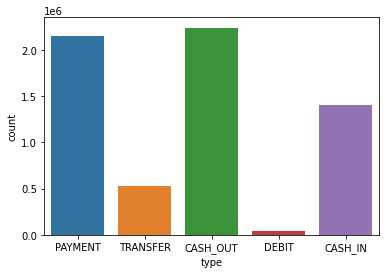

In [10]:
sns.countplot(x='type',data=data)

In [172]:
# type = data["type"].value_counts()
# transactions = type.index
# quantity = type.values
# figure = px.pie(data, 
#              values=quantity, 
#              names=transactions,hole = 0.5, 
#              title="Distribution of Transaction Type")
# figure.show()

Cash out and payment are the most common type of transactions.

<AxesSubplot:xlabel='type', ylabel='amount'>

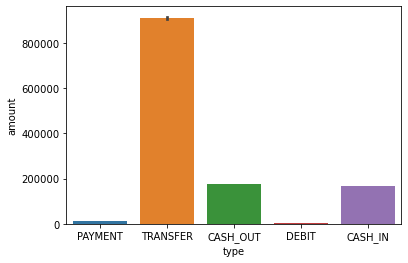

In [12]:
# lets see cash with payement.
sns.barplot(x='type',y='amount',data=data)

-----------
### 3. Data distribution.

<AxesSubplot:xlabel='step', ylabel='Density'>

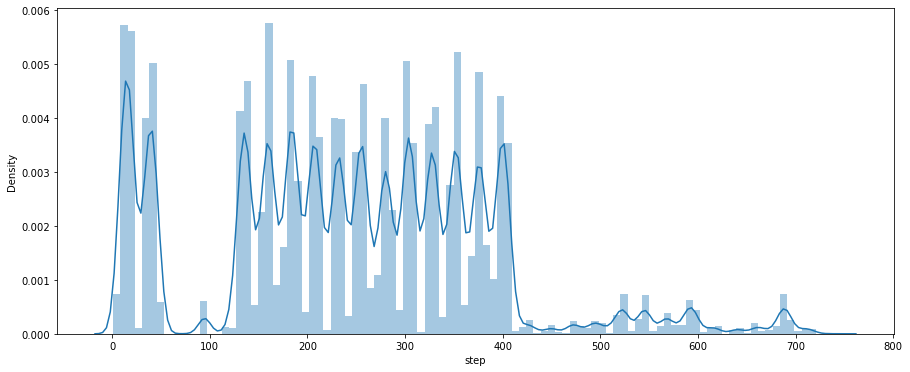

In [13]:
#distribution of the step column
plt.figure(figsize=(15,6))
sns.distplot(data['step'],bins=100)

Text(0, 0.5, 'amount')

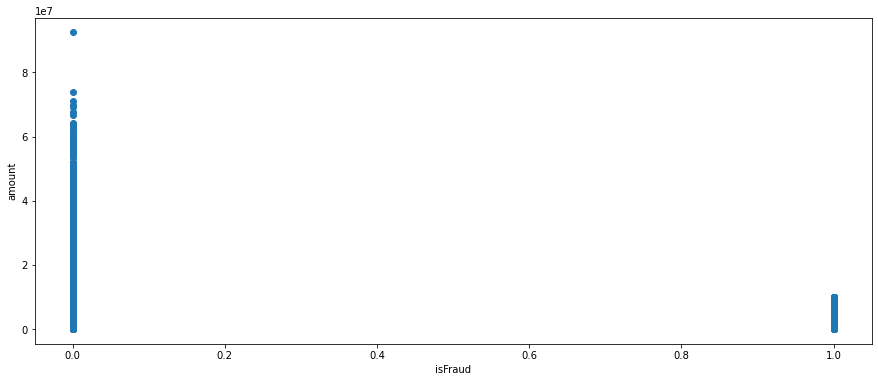

In [14]:
plt.figure(figsize=(15,6))
plt.scatter(x='isFraud',y='amount',data=data)
plt.xlabel('isFraud')
plt.ylabel('amount')

In [15]:
data['isFraud'].value_counts()

0    6354407
1       8213
Name: isFraud, dtype: int64

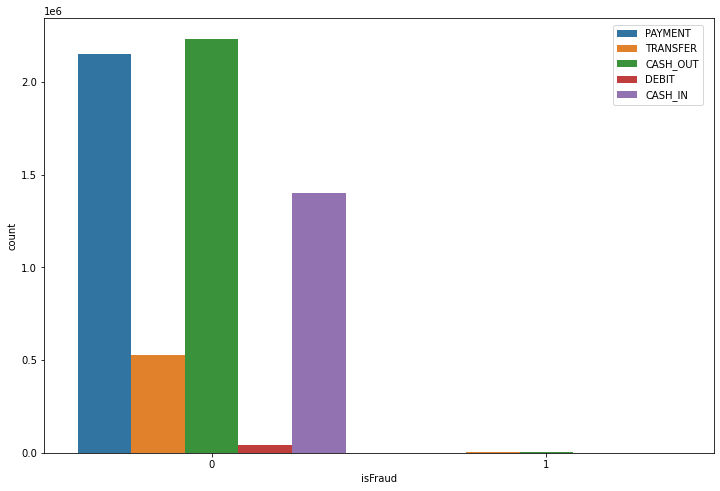

In [16]:
plt.figure(figsize=(12,8))
sns.countplot(x='isFraud',data=data,hue='type')
plt.legend(loc=[0.85,0.8])

- 8213 transactions have been tagged as fraudulent in the dataset, which is approx. 0.13% of the total number of transactions.
- Although the amount of fraudulent transactions is very low, majority of them are constituted within 0 and 1e7 (10,000,000) amount.
- Cash out and payement are having the lion's shareز

-----------
### 4. let us check the correlation.

In [17]:
correlation = data.corr()
print(correlation["isFraud"].sort_values(ascending=False))

isFraud           1.000000
amount            0.076688
isFlaggedFraud    0.044109
step              0.031578
oldbalanceOrg     0.010154
newbalanceDest    0.000535
oldbalanceDest   -0.005885
newbalanceOrig   -0.008148
Name: isFraud, dtype: float64


- If we put a threshold of 0.3 to indicate relative correlation, it is obivious that there is no correlation between the
target value and the remaining features.

-----------
### 5. lets do some categorical encoding.

In [18]:
# label_encoder object knows how to understand word labels it translates the categroize into numerical values in same col.
label_encoder = preprocessing.LabelEncoder()
data['type']= label_encoder.fit_transform(data['type'])
data['nameOrig']= label_encoder.fit_transform(data['nameOrig'])
data['nameDest']= label_encoder.fit_transform(data['nameDest'])

In [19]:
data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,3,9839.64,757869,170136.0,160296.36,1662094,0.0,0.0,0,0
1,1,3,1864.28,2188998,21249.0,19384.72,1733924,0.0,0.0,0,0
2,1,4,181.00,1002156,181.0,0.00,439685,0.0,0.0,1,0
3,1,1,181.00,5828262,181.0,0.00,391696,21182.0,0.0,1,0
4,1,3,11668.14,3445981,41554.0,29885.86,828919,0.0,0.0,0,0


-----------
# <center> Buidling the model and dividing the data set </center>
-----------

In [20]:
# axis : {0 or 'index', 1 or 'columns'}, default 0 Whether to drop labels from the index (0 or 'index') or columns (1 or 'columns').
X = data.drop('isFraud', axis=1)
y = data['isFraud']


In [21]:
scaler = MinMaxScaler()
scaler.fit(X)
X = scaler.transform(X)

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=101)
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, 
    test_size=0.25,random_state=101) #0.8*0.25=0.2

In [23]:
# here we intialize the model and fit it to the train data
classifier = LogisticRegression(penalty= 'none',random_state = 0)
classifier.fit(X_train, y_train)

LogisticRegression(penalty='none', random_state=0)

In [24]:
# feed our model with the cross validation data
y_pred_valid = classifier.predict(X_valid)


### Evaluate the Model
-----------

In [25]:
[tn, fp, fn, tp]= confusion_matrix(y_valid, y_pred_valid).ravel()
 
print ("Confusion Matrix : \n", tn, fp, fn, tp )

Confusion Matrix : 
 1270782 81 949 712


In [26]:
# lets make the cost function
def cost_function_j(y_pred,y):
    m = y.shape[0]
    return (1/(2*m))*np.sum((y_pred-y)**2)

In [27]:
def cost(y_predict, y, X):
    y1 = y_predict
    return -(1/len(X)) * np.sum(y*np.log(y1) + (1-y)*np.log(1-y1))
# This is just a straightforward implementation of the cost function equation above.

In [28]:
print(cost_function_j(y_valid, y_pred_valid))
print(cost_function_j(y_test, classifier.predict(X_test)))

0.0004047074947112982
0.0004019570554268525


In [29]:
# accuracy_score cthis function computes subset accuracy:
# the set of labels predicted for a sample must *exactly* match the
# corresponding set of labels in y_true.
print ("Accuracy : ", accuracy_score(y_valid, y_pred_valid))
print ("Accuracy : ", accuracy_score(y_test, classifier.predict(X_test)))

Accuracy :  0.9991905850105774
Accuracy :  0.9991960858891463


In [30]:
# Recall is the ratio of correctly predicted outcomes to all predictions. It is also known as sensitivity or specificity
# Accuracy is the ratio of correct predictions out of all predictions made by an algorithm. It can be calculated by dividing precision by recall or as 1 minus false negative rate (FNR) divided by false positive rate (FPR).
# The F1-score combines these three metrics into one single metric that ranges from 0 to 1 and it takes into account both Precision and Recall. The F1 score is needed when accuracy and how many of your ads are shown are important to you
print(classification_report(y_valid,y_pred_valid))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270863
           1       0.90      0.43      0.58      1661

    accuracy                           1.00   1272524
   macro avg       0.95      0.71      0.79   1272524
weighted avg       1.00      1.00      1.00   1272524



In [43]:
print(recall_score(y_valid,y_pred_valid))

0.4286574352799518


In [40]:
from sklearn import metrics

In [41]:
c_matrix = metrics.confusion_matrix(y_valid,y_pred_valid)
c_matrix

array([[1270782,      81],
       [    949,     712]], dtype=int64)

In [100]:
print(classification_report(y_test,classifier.predict(X_test)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270897
           1       0.93      0.40      0.56      1627

    accuracy                           1.00   1272524
   macro avg       0.96      0.70      0.78   1272524
weighted avg       1.00      1.00      1.00   1272524



### What does this mean?
- Precision false positive rate.
- Recall true positive rate.

-----------------
## <center> Testing different parameters to understand how accuracies change. </center>
##### <center> + </center>
## <center> Regularization. </center>

Understanding how decision regions change when using different regularization values.

Remember that we use paramter C as our regularization parameter. Parameter C = 1/λ.

Lambda (λ) controls the trade-off between allowing the model to increase it's complexity as much as it wants with trying to keep it simple.

For example, if λ is very low or 0, the model will have enough power to increase it's complexity (overfit) by assigning big values to the weights for each parameter. 

If, in the other hand, we increase the value of λ, the model will tend to underfit, as the model will become too simple.

Parameter C will work the other way around. For small values of C, we increase the regularization strength which will create simple models which underfit the data. For big values of C, we low the power of regularization which imples the model is allowed to increase it's complexity, and therefore, overfit the data.

#### what is L1 and L2?
>> A regression model that uses L1 regularization technique is called Lasso Regression and model which uses L2 is called Ridge    Regression.

>> The key difference between these two is the penalty term.

>> Ridge regression adds “squared magnitude” of coefficient as penalty term to the loss function. Here the highlighted part       represents L2 regularization element.

-----------

In [45]:
# https://www.kaggle.com/code/joparga3/2-tuning-parameters-for-logistic-regression/notebook

-----------
#### First try different c with the L2 penalty (ridge)

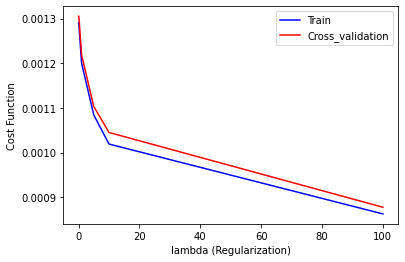

In [69]:
predict_val=[]
predict_train=[]
min=[]
C_param_range = [0.001,0.01,0.1,1,5,10,100, 100]
for i in C_param_range:
    lr_clf=LogisticRegression(C=i)
    lr_clf.fit(X_train,y_train)
    pred_val=lr_clf.predict(X_valid)
    accuracy_val=accuracy_score(y_valid,pred_val)
    err_val=1-accuracy_val
    predict_val.append(1-accuracy_val)
    
    pred_train=lr_clf.predict(X_train)
    accuracy_train=accuracy_score(y_train,pred_train)
    predict_train.append(1-accuracy_train)


    
fig, ax = plt.subplots()
ax.plot(C_param_range, predict_train, '-b', label='Train')
ax.plot(C_param_range, predict_val, '-r', label='Cross_validation')
plt.xlabel("lambda (Regularization)")
plt.ylabel("Cost Function")
leg = ax.legend();

In [31]:
# here we intialize the model and fit it to the train data
classifier = LogisticRegression(penalty= 'l2',C=100)
classifier.fit(X_train, y_train)
print(classification_report(y_test,classifier.predict(X_test)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270897
           1       0.96      0.34      0.50      1627

    accuracy                           1.00   1272524
   macro avg       0.98      0.67      0.75   1272524
weighted avg       1.00      1.00      1.00   1272524



In [47]:
print(recall_score(y_test,classifier.predict(X_test)))

0.3423478795328826


In [49]:
c_matrix = metrics.confusion_matrix(y_test,classifier.predict(X_test))
c_matrix

array([[1270872,      25],
       [   1070,     557]], dtype=int64)

In [45]:
print(classification_report(y_test,classifier.predict(X_test)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270897
           1       0.96      0.34      0.50      1627

    accuracy                           1.00   1272524
   macro avg       0.98      0.67      0.75   1272524
weighted avg       1.00      1.00      1.00   1272524



from the curve we can conclude that the best C is 100 then lambda equals 0.01

-----------
#### second try different c with the L1 penalty (Lasso).


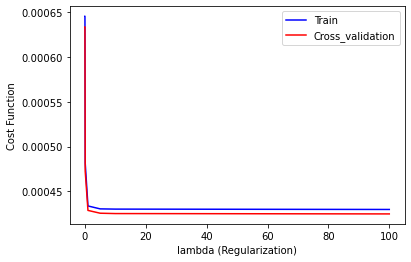

In [67]:
predict_val=[]
predict_train=[]
min=[]
C_param_range = [0.001,0.01,0.1,1,5,10,100]
for i in C_param_range:
    lr_clf=LogisticRegression(penalty='l1', C=i, solver='saga')
    lr_clf.fit(X_train,y_train)
    pred_val=lr_clf.predict(X_valid)
    predict_val.append(cost_function_j(y_valid,pred_val))
#     err_val=1-accuracy_val
#     predict_val.append(1-accuracy_val)
    
    pred_train=lr_clf.predict(X_train)
    predict_train.append(cost_function_j(y_train,pred_train))
#     predict_train.append(1-accuracy_train)


    
fig, ax = plt.subplots()
ax.plot(C_param_range, predict_train, '-b', label='Train')
ax.plot(C_param_range, predict_val, '-r', label='Cross_validation')
plt.xlabel("lambda (Regularization)")
plt.ylabel("Cost Function")
leg = ax.legend();

The data is plateauing

In [32]:
# here we intialize the model and fit it to the train data
classifier = LogisticRegression(penalty= 'l1',C=100, solver='saga')
classifier.fit(X_train, y_train)
print(classification_report(y_test,classifier.predict(X_test)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270897
           1       0.96      0.34      0.50      1627

    accuracy                           1.00   1272524
   macro avg       0.98      0.67      0.75   1272524
weighted avg       1.00      1.00      1.00   1272524



####  Another way for regularization

In [50]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedKFold
model = LogisticRegression(penalty="l2")
# define model evaluation method
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# define grid
grid = dict()
grid['C'] = [0.001,0.01,0.1,1,5,10,100]
# define search
search = GridSearchCV(model, grid, scoring='recall', cv=cv, n_jobs=-1)
# perform the search
results = search.fit(X, y)
# summarize
print('MAE: %.3f' % results.best_score_)
print('Config: %s' % results.best_params_)

MAE: 0.370
Config: {'C': 100}


In [105]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedKFold
model = LogisticRegression(penalty="l1",solver='saga')
# define model evaluation method
cv = RepeatedKFold(n_splits=4, n_repeats=1, random_state=1)
# define grid
grid = dict()
grid['C'] = [0.001,0.01,0.1,1,5,10,100]
# define search
search = GridSearchCV(model, grid, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
# perform the search
results = search.fit(X, y)
# summarize
print('MAE: %.3f' % results.best_score_)
print('Config: %s' % results.best_params_)

MAE: -0.001
Config: {'C': 100}


from the curve we can conclude that the best C is 5 then lambda equals 0.2

# <center> Apply K-Fold & Stratified Sampling techniques </center>
- KFold is a cross-validator that divides the dataset into k folds.

- Stratified is to ensure that each fold of dataset has the same proportion of observations with a given label.

- So, it means that StratifiedKFold is the improved version of KFold

### 1. stratified k-fold
Stratified K fold cross-validation object is a variation of KFold that returns stratified folds. The folds are made by preserving the percentage of samples for each class.

In [34]:
# https://www.geeksforgeeks.org/stratified-k-fold-cross-validation/?ref=gcse
from statistics import mean, stdev
from sklearn import preprocessing
from sklearn.model_selection import StratifiedKFold
from sklearn import linear_model
from sklearn import datasets
# Create StratifiedKFold object.
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)
lst_accu_stratified = []
lr = LogisticRegression(C=100)
# Feature Scaling for input features.
scaler = MinMaxScaler()
scaler.fit(X)
x_scaled = scaler.transform(X)

for train_index, test_index in skf.split(X, y):
    x_train_fold, x_test_fold = x_scaled[train_index], x_scaled[test_index]
    y_train_fold, y_test_fold = y[train_index], y[test_index]
    lr.fit(x_train_fold, y_train_fold)
    lst_accu_stratified.append(lr.score(x_test_fold, y_test_fold))
  

the upper method id on ridge

In [35]:
# Print the output.
print('List of possible accuracy:', lst_accu_stratified)
print('\nMaximum Accuracy That can be obtained from this model is:',
      np.max(lst_accu_stratified)*100, '%')
print('\nMinimum Accuracy:',
      np.min(lst_accu_stratified)*100, '%')
print('\nOverall Accuracy:',
      mean(lst_accu_stratified)*100, '%')
print('\nStandard Deviation is:', stdev(lst_accu_stratified))

List of possible accuracy: [0.9989925533820974, 0.9989909817025062, 0.9990365604106485, 0.9990318453718751, 0.9989941250616884, 0.9990129852167817, 0.9990334170514662, 0.9989941250616884, 0.9990255586535106, 0.9990287020126929]

Maximum Accuracy That can be obtained from this model is: 99.90365604106485 %

Minimum Accuracy: 99.89909817025062 %

Overall Accuracy: 99.90140853924956 %

Standard Deviation is: 1.9249778101984054e-05


### 2. Normal k-fold

In [36]:
#load scikit-learn k-fold cross-validation
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

#setup for k-Fold Cross Validation
cv = KFold(n_splits=20, shuffle=True, random_state=0)
#define model
model = lr
#create model, perform cross validation and evaluate model
scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
#performance result
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Accuracy: 0.999 (0.000)


### 3. Stratified Sampling Using Proportions and counts
Stratified random sampling is a sampling method that involves taking samples of a population subdivided into smaller groups called strata. These strata are based on shared characteristics such as demographic traits.

In [37]:
# Using Proportions, this means that the set will have same proportions as the Big data set, this fully represenets the data set
N = 20
#perform stratified random sampling
data.groupby('isFraud', group_keys=False).apply(lambda x: x.sample(int(np.rint(N*len(x)/len(data))))).sample(frac=1).reset_index(drop=True)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,279,3,12839.66,2488915,111738.98,98899.32,1552586,0.00,0.00,0,0
1,275,1,3282.74,4100943,0.00,0.00,291917,1657748.28,1661031.02,0,0
2,353,3,27644.19,4018642,39973.00,12328.81,1694895,0.00,0.00,0,0
3,19,3,6193.26,6252651,35779.31,29586.04,1635829,0.00,0.00,0,0
4,161,3,10248.73,4110732,0.00,0.00,627425,0.00,0.00,0,0
5,17,1,137793.94,4438960,0.00,0.00,444316,200319.10,463368.38,0,0
6,164,3,3598.64,3816467,949.00,0.00,1898938,0.00,0.00,0,0
7,163,1,28484.24,3817212,880.00,0.00,370834,0.00,28484.24,0,0
8,420,3,21532.16,5580107,20438.00,0.00,1795612,0.00,0.00,0,0
9,401,1,200300.52,2522482,540998.00,340697.48,130815,474684.37,674984.89,0,0


In [38]:
# a second possible way for this is by specifing the number of the counts itsefl, for example we need a sample of 3 zeros and 3 ones.
data.groupby('isFraud', group_keys=False).apply(lambda x: x.sample(3))

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
4812449,346,1,58929.20,3041849,4488.00,0.00,222054,3624900.98,3683830.18,0,0
3375326,254,1,37261.20,4913595,0.00,0.00,285511,418633.43,455894.62,0,0
2134782,184,3,26951.71,3806896,402823.00,375871.29,1358781,0.00,0.00,0,0
2112305,183,4,627903.12,623140,627903.12,0.00,214894,0.00,0.00,1,0
4863913,348,4,291264.20,2943898,291264.20,0.00,535601,0.00,0.00,1,0
3611350,273,1,159106.12,1195330,159106.12,0.00,372185,0.00,159106.12,1,0


# <center> SVM </center>

In [117]:
# Using Proportions, this means that the set will have same proportions as the Big data set, this fully represenets the data set
N = 100000
#perform stratified random sampling
Stratified_data=data.groupby('isFraud', group_keys=False).apply(lambda x: x.sample(int(np.rint(N*len(x)/len(data))))).sample(frac=1).reset_index(drop=True)

In [118]:
Stratified_data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,303,3,28667.60,4784053,31415.0,2747.40,1296759,0.00,0.00,0,0
1,234,1,29570.23,1757305,121808.0,92237.77,228576,0.00,29570.23,0,0
2,228,3,28402.35,673589,293.0,0.00,614527,0.00,0.00,0,0
3,402,4,314765.78,2351797,60718.0,0.00,338700,44820.53,359586.30,0,0
4,350,1,353034.86,2039892,0.0,0.00,52094,3572426.61,3925461.47,0,0


In [119]:
# axis : {0 or 'index', 1 or 'columns'}, default 0 Whether to drop labels from the index (0 or 'index') or columns (1 or 'columns').
X = Stratified_data.drop('isFraud', axis=1)
y = Stratified_data['isFraud']


In [120]:
scaler = MinMaxScaler()
scaler.fit(X)
X = scaler.transform(X)

In [121]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, 
    test_size=0.25) #0.8*0.25=0.2

In [89]:
# import SVC classifier
from sklearn.svm import SVC


# import metrics to compute accuracy
from sklearn.metrics import accuracy_score


# instantiate classifier with default hyperparameters
svc=SVC() 


# fit classifier to training set
svc.fit(X_train,y_train)


# make predictions on test set
y_pred=svc.predict(X_test)


# compute and print accuracy score
print('Model accuracy score with default hyperparameters: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with default hyperparameters: 0.9982


##### Cleary the accuracy of the SVM and the  accuracy of logistic regression are so close.

### <center> Changing the degree of the logistic regression </center>

In [122]:
from sklearn.preprocessing import PolynomialFeatures
def poly(deg):
    poly = PolynomialFeatures(degree = deg, interaction_only=False, include_bias=False)
    X_poly = poly.fit_transform(X_train)
    X_valid_pol=poly.transform(X_valid)
    lr = LogisticRegression()
    lr.fit(X_poly,y_train)
    return lr.score(X_poly, y_train), lr.score(X_valid_pol, y_valid)

In [128]:
listy_list_train=[]
listy_list_valid=[]
for deg in range(1,8):
    train, valid=poly(deg)
    listy_list_train.append(train)
    listy_list_valid.append(valid)

In [129]:
listy_list_train

[0.9988333333333334,
 0.99885,
 0.99885,
 0.99885,
 0.9988666666666667,
 0.9988666666666667,
 0.9988666666666667]

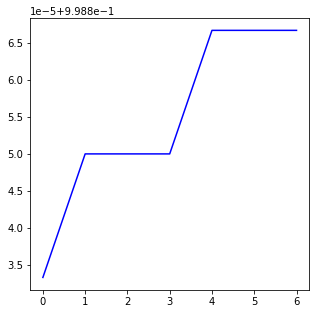

In [130]:
plt.figure(figsize=[5,5])

plt.plot(range(0, len(listy_list_train)), listy_list_train, color ='b')

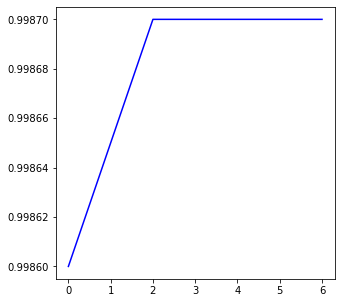

In [131]:
plt.figure(figsize=[5,5])
plt.plot(range(0, len(listy_list_valid)), listy_list_valid, color ='b')

In [132]:
listy_list_valid

[0.9986, 0.99865, 0.9987, 0.9987, 0.9987, 0.9987, 0.9987]

### <center> Changing the parameters of logistic regression </center>

In [143]:
import numpy as np
from sklearn.linear_model import LinearRegression

In [144]:
classifier = LogisticRegression(penalty= 'none',random_state = 0)
classifier.fit(X_train, y_train)

LogisticRegression(penalty='none', random_state=0)

In [156]:
classifier.coef_

array([[-7.01932147,  5.26257872,  7.72535334,  0.08889079,  6.38539475,
         1.3299179 ,  6.99438949, -6.62432802,  1.32884271,  6.39186306]])

In [164]:
train_list=[]
valid_list=[]
test_list=[]
for i in range(0, 10000):
    classifier.coef_= np.random.uniform(-10, 10,[1,10])
    # reg.predict(X_train)
    train_list.append(np.sqrt(mean_squared_error(classifier.predict(X_train), y_train)))
    valid_list.append(np.sqrt(mean_squared_error(classifier.predict(X_valid), y_valid)))
    test_list.append(np.sqrt(mean_squared_error(classifier.predict(X_test), y_test)))

In [165]:
classifier.coef_

array([[ 7.41461931, -3.08275092, -0.18608908, -2.30582392,  3.37248317,
        -0.17201437,  9.77458864,  6.11450466, -5.25918356, -8.51989834]])

In [166]:
np.min(train_list), np.min(valid_list), np.min(test_list)

(0.033166247903554, 0.035355339059327376, 0.03872983346207417)

In [167]:
np.argmin(train_list), np.argmin(valid_list), np.argmin(test_list)

(2842, 4027, 4027)

In [168]:
import numpy as np

In [169]:
from sklearn.linear_model import LogisticRegression

In [170]:
reg = LogisticRegression().fit(X_train, y_train)
print(np.sqrt(mean_squared_error(reg.predict(X_train), y_train)))
print(np.sqrt(mean_squared_error(reg.predict(X_valid), y_valid)))
print(np.sqrt(mean_squared_error(reg.predict(X_test), y_test)))

0.034156502553198666
0.03741657386773942
0.039370039370059055


From the above results after runing 10000 random coifficients we can conclude that the best tuple of the random solution
is close to the best solution of the automatically defined solution. Although the close of the values yet the predefined coff are better than the random sol.

# <center> Logistic regression from scratch </center>

https://towardsdatascience.com/a-complete-logistic-regression-algorithm-from-scratch-in-python-step-by-step-ce33eae7d703

### 1. Develop the hypothesis.

In [39]:
def hypothesis(X, theta):
    z = np.dot(theta, X.T)
    return 1/(1+np.exp(-(z))) - 0.0000001
# deducted 0.0000001 from the output here because of this expression in the cost log(1-h)

### 2. Determine the cost function.

In [40]:
def cost(y_predict, y):
    y1 = y_predict
    return -(1/len(X)) * np.sum(y*np.log(y1) + (1-y)*np.log(1-y1))
# This is just a straightforward implementation of the cost function equation above.

### 3. Update the theta values.

In [41]:
def gradient_descent(X, y, theta, alpha, epochs):
    m =len(X)
    J = [cost(X, y, theta)] 
    for i in range(0, epochs):
        h = hypothesis(X, theta)
        for i in range(0, len(X.columns)):
            theta[i] -= (alpha/m) * np.sum((h-y)*X.iloc[:, i])
        J.append(cost(X, y, theta))
    return J, theta

### 4. Calculate the final prediction and accuracy

In [42]:
def predict(X, y, theta, alpha, epochs):
    J, th = gradient_descent(X, y, theta, alpha, epochs) 
    h = hypothesis(X, theta)
    for i in range(len(h)):
        h[i]=1 if h[i]>=0.5 else 0
    y = list(y)
    acc = np.sum([y[i] == h[i] for i in range(len(y))])/len(y)
    return J, acc

# <center> <font color='red'>تم بحمد الله وتوفيقه</font> </center>